# 1.Introduction
### 1.1. Robot Simulation with Trails and Dynamic Lighting
**This project simulates the behavior of four types of robots using Python and Matplotlib. The simulation includes a robotic arm, a bouncing robot, a path-following robot, and an obstacle-avoidance robot.**

In [1]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### 1.2. Load Robot Icons
This section loads the robot icons that will be used in the simulation. Make sure the icons are stored in the icons/ directory.

In [2]:
# Load robot icons
bouncing_robot_icon = plt.imread("icons/bouncing_robot.png")
path_following_robot_icon = plt.imread("icons/path_following_robot.png")
obstacle_avoidance_robot_icon = plt.imread("icons/obstacle_avoidance_robot.png")

#### 1.3. Simulation Parameters
Here, we define the parameters for the simulation, such as the number of frames and the length of the trail that follows each robot.

In [3]:
# Simulation parameters
frames = 400  # 10 seconds at 20 fps
trail_length = 40  # Number of points in the trail

#### 1.4. Initialize Trail Data
This section initializes arrays to store the trail data for each robot. The trails will show the path taken by the robots.

In [4]:
# Initialize trail data
trail_x2, trail_y2 = np.zeros((2, trail_length))  # For bouncing robot
trail_x3, trail_y3 = np.zeros((2, trail_length))  # For path-following robot
trail_x4, trail_y4 = np.zeros((2, trail_length))  # For obstacle-avoidance robot

### 2. Define Robot Behaviors
Each robot has a specific behavior defined by a function. These functions calculate the position of the robots at each frame.

#### 2.1.Robotic Arm Picking Objects
The robotic arm moves in a quarter-circle arc to simulate picking objects.

In [5]:
# 1. Robotic Arm Picking Objects
def robotic_arm():
    theta = np.linspace(0, np.pi/2, frames)
    x = 0.3 * np.cos(theta)
    y = 0.3 * np.sin(theta)
    return x, y

#### 2.2.Bouncing Robot
The bouncing robot moves horizontally while bouncing up and down.

In [6]:
# 2. Bouncing Robot
def bouncing_robot():
    x = np.linspace(-0.3, 0.3, frames)
    y = 0.2 * np.abs(np.sin(2 * np.pi * np.linspace(0, 1, frames)))  # Bouncing effect
    return x, y

#### 2.3.Path Following Robot
The path-following robot moves in a circular path.

In [7]:
# 3. Path Following Robot
def path_following_robot():
    t = np.linspace(0, 2 * np.pi, frames)
    x = 0.3 * np.cos(t)
    y = 0.3 * np.sin(t)
    return x, y

#### 2.4.Obstacle Avoidance Robot
The obstacle-avoidance robot moves in a zigzag pattern to simulate avoiding obstacles.

In [8]:
# 4. Obstacle Avoidance Robot
def obstacle_avoidance_robot():
    x = np.linspace(-0.3, 0.3, frames)
    y = 0.1 * np.sin(5 * np.pi * np.linspace(0, 1, frames))  # Zigzag motion
    return x, y

#### 2.5. Setup the Figure
This section sets up the figure and subplots for the simulation. Each subplot corresponds to a different robot.

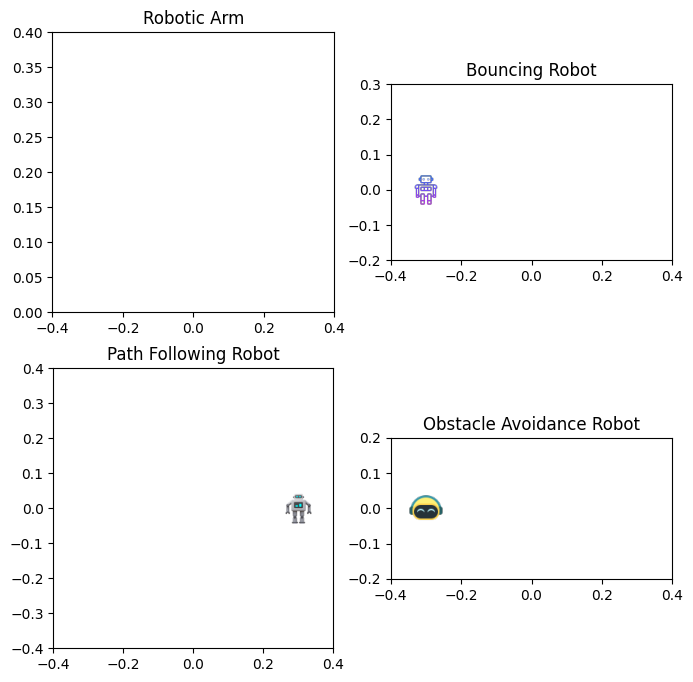

In [9]:
# Setup figure
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Robotic Arm
x1, y1 = robotic_arm()
arm, = ax[0, 0].plot([], [], 'bo-', markersize=8)
ax[0, 0].set_title("Robotic Arm")
ax[0, 0].set_xlim(-0.4, 0.4)
ax[0, 0].set_ylim(0, 0.4)

# Bouncing Robot
x2, y2 = bouncing_robot()
robot2 = ax[0, 1].imshow(bouncing_robot_icon, extent=[x2[0]-0.05, x2[0]+0.05, y2[0]-0.05, y2[0]+0.05], alpha=1.0)
ax[0, 1].set_title("Bouncing Robot")
ax[0, 1].set_xlim(-0.4, 0.4)
ax[0, 1].set_ylim(-0.2, 0.3)
trail_line2, = ax[0, 1].plot([], [], 'g-', alpha=0.5)  # Trail for bouncing robot

# Path Following Robot
x3, y3 = path_following_robot()
robot3 = ax[1, 0].imshow(path_following_robot_icon, extent=[x3[0]-0.05, x3[0]+0.05, y3[0]-0.05, y3[0]+0.05], alpha=1.0)
ax[1, 0].set_title("Path Following Robot")
ax[1, 0].set_xlim(-0.4, 0.4)
ax[1, 0].set_ylim(-0.4, 0.4)
trail_line3, = ax[1, 0].plot([], [], 'r-', alpha=0.5)  # Trail for path-following robot

# Obstacle Avoidance Robot
x4, y4 = obstacle_avoidance_robot()
robot4 = ax[1, 1].imshow(obstacle_avoidance_robot_icon, extent=[x4[0]-0.05, x4[0]+0.05, y4[0]-0.05, y4[0]+0.05], alpha=1.0)
ax[1, 1].set_title("Obstacle Avoidance Robot")
ax[1, 1].set_xlim(-0.4, 0.4)
ax[1, 1].set_ylim(-0.2, 0.2)
trail_line4, = ax[1, 1].plot([], [], 'b-', alpha=0.5)  # Trail for obstacle-avoidance robot

#### 2.6. Animation Function
The update function is called for each frame of the animation. It updates the positions of the robots and their trails.

In [10]:
# Animation function
def update(frame):
    # Update trails
    trail_x2[:-1] = trail_x2[1:]
    trail_y2[:-1] = trail_y2[1:]
    trail_x2[-1] = x2[frame]
    trail_y2[-1] = y2[frame]

    trail_x3[:-1] = trail_x3[1:]
    trail_y3[:-1] = trail_y3[1:]
    trail_x3[-1] = x3[frame]
    trail_y3[-1] = y3[frame]

    trail_x4[:-1] = trail_x4[1:]
    trail_y4[:-1] = trail_y4[1:]
    trail_x4[-1] = x4[frame]
    trail_y4[-1] = y4[frame]

    # Update robot positions
    arm.set_data([0, x1[frame]], [0, y1[frame]])
    robot2.set_extent([x2[frame]-0.05, x2[frame]+0.05, y2[frame]-0.05, y2[frame]+0.05])
    robot3.set_extent([x3[frame]-0.05, x3[frame]+0.05, y3[frame]-0.05, y3[frame]+0.05])
    robot4.set_extent([x4[frame]-0.05, x4[frame]+0.05, y4[frame]-0.05, y4[frame]+0.05])

    # Update trails
    trail_line2.set_data(trail_x2, trail_y2)
    trail_line3.set_data(trail_x3, trail_y3)
    trail_line4.set_data(trail_x4, trail_y4)

    # Dynamic lighting (adjust alpha based on y-position)
    robot2.set_alpha(0.5 + 0.5 * (y2[frame] / 0.2))  # Bouncing robot
    robot3.set_alpha(0.5 + 0.5 * (y3[frame] / 0.3))  # Path-following robot
    robot4.set_alpha(0.5 + 0.5 * (y4[frame] / 0.1))  # Obstacle-avoidance robot

    return arm, robot2, robot3, robot4, trail_line2, trail_line3, trail_line4

#### 2.7. Create and Save the Animation
This section creates the animation and saves it as a GIF file.

In [ ]:
# Animate
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)

# Save animation as GIF
ani.save("robot_simulation_with_trails_and_lighting.gif", writer=animation.PillowWriter(fps=40))

# Display the animation
plt.show()

#### Summary
##### 1.The code simulates four types of robots: a robotic arm, a bouncing robot, a path-following robot, and an obstacle-avoidance robot.
##### 2.Each robot's behavior is defined by a function that calculates its position at each frame.
##### 3.The animation is saved as a GIF file for easy sharing.

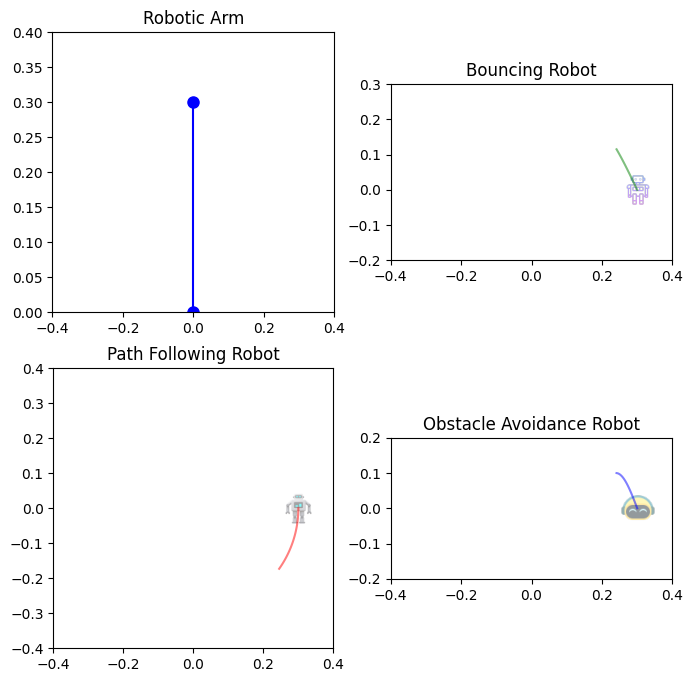

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load robot icons
bouncing_robot_icon = plt.imread("icons/bouncing_robot.png")
path_following_robot_icon = plt.imread("icons/path_following_robot.png")
obstacle_avoidance_robot_icon = plt.imread("icons/obstacle_avoidance_robot.png")

# Simulation parameters
frames = 400  # 10 seconds at 20 fps
trail_length = 40  # Number of points in the trail

# Initialize trail data
trail_x2, trail_y2 = np.zeros((2, trail_length))  # For bouncing robot
trail_x3, trail_y3 = np.zeros((2, trail_length))  # For path-following robot
trail_x4, trail_y4 = np.zeros((2, trail_length))  # For obstacle-avoidance robot

# 1. Robotic Arm Picking Objects
def robotic_arm():
    theta = np.linspace(0, np.pi/2, frames)
    x = 0.3 * np.cos(theta)
    y = 0.3 * np.sin(theta)
    return x, y

# 2. Bouncing Robot
def bouncing_robot():
    x = np.linspace(-0.3, 0.3, frames)
    y = 0.2 * np.abs(np.sin(2 * np.pi * np.linspace(0, 1, frames)))  # Bouncing effect
    return x, y

# 3. Path Following Robot
def path_following_robot():
    t = np.linspace(0, 2 * np.pi, frames)
    x = 0.3 * np.cos(t)
    y = 0.3 * np.sin(t)
    return x, y

# 4. Obstacle Avoidance Robot
def obstacle_avoidance_robot():
    x = np.linspace(-0.3, 0.3, frames)
    y = 0.1 * np.sin(5 * np.pi * np.linspace(0, 1, frames))  # Zigzag motion
    return x, y

# Setup figure
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Robotic Arm
x1, y1 = robotic_arm()
arm, = ax[0, 0].plot([], [], 'bo-', markersize=8)
ax[0, 0].set_title("Robotic Arm")
ax[0, 0].set_xlim(-0.4, 0.4)
ax[0, 0].set_ylim(0, 0.4)

# Bouncing Robot
x2, y2 = bouncing_robot()
robot2 = ax[0, 1].imshow(bouncing_robot_icon, extent=[x2[0]-0.05, x2[0]+0.05, y2[0]-0.05, y2[0]+0.05], alpha=1.0)
ax[0, 1].set_title("Bouncing Robot")
ax[0, 1].set_xlim(-0.4, 0.4)
ax[0, 1].set_ylim(-0.2, 0.3)
trail_line2, = ax[0, 1].plot([], [], 'g-', alpha=0.5)  # Trail for bouncing robot

# Path Following Robot
x3, y3 = path_following_robot()
robot3 = ax[1, 0].imshow(path_following_robot_icon, extent=[x3[0]-0.05, x3[0]+0.05, y3[0]-0.05, y3[0]+0.05], alpha=1.0)
ax[1, 0].set_title("Path Following Robot")
ax[1, 0].set_xlim(-0.4, 0.4)
ax[1, 0].set_ylim(-0.4, 0.4)
trail_line3, = ax[1, 0].plot([], [], 'r-', alpha=0.5)  # Trail for path-following robot

# Obstacle Avoidance Robot
x4, y4 = obstacle_avoidance_robot()
robot4 = ax[1, 1].imshow(obstacle_avoidance_robot_icon, extent=[x4[0]-0.05, x4[0]+0.05, y4[0]-0.05, y4[0]+0.05], alpha=1.0)
ax[1, 1].set_title("Obstacle Avoidance Robot")
ax[1, 1].set_xlim(-0.4, 0.4)
ax[1, 1].set_ylim(-0.2, 0.2)
trail_line4, = ax[1, 1].plot([], [], 'b-', alpha=0.5)  # Trail for obstacle-avoidance robot

# Animation function
def update(frame):
    # Update trails
    trail_x2[:-1] = trail_x2[1:]
    trail_y2[:-1] = trail_y2[1:]
    trail_x2[-1] = x2[frame]
    trail_y2[-1] = y2[frame]

    trail_x3[:-1] = trail_x3[1:]
    trail_y3[:-1] = trail_y3[1:]
    trail_x3[-1] = x3[frame]
    trail_y3[-1] = y3[frame]

    trail_x4[:-1] = trail_x4[1:]
    trail_y4[:-1] = trail_y4[1:]
    trail_x4[-1] = x4[frame]
    trail_y4[-1] = y4[frame]

    # Update robot positions
    arm.set_data([0, x1[frame]], [0, y1[frame]])
    robot2.set_extent([x2[frame]-0.05, x2[frame]+0.05, y2[frame]-0.05, y2[frame]+0.05])
    robot3.set_extent([x3[frame]-0.05, x3[frame]+0.05, y3[frame]-0.05, y3[frame]+0.05])
    robot4.set_extent([x4[frame]-0.05, x4[frame]+0.05, y4[frame]-0.05, y4[frame]+0.05])

    # Update trails
    trail_line2.set_data(trail_x2, trail_y2)
    trail_line3.set_data(trail_x3, trail_y3)
    trail_line4.set_data(trail_x4, trail_y4)

    # Dynamic lighting (adjust alpha based on y-position)
    robot2.set_alpha(0.5 + 0.5 * (y2[frame] / 0.2))  # Bouncing robot
    robot3.set_alpha(0.5 + 0.5 * (y3[frame] / 0.3))  # Path-following robot
    robot4.set_alpha(0.5 + 0.5 * (y4[frame] / 0.1))  # Obstacle-avoidance robot

    return arm, robot2, robot3, robot4, trail_line2, trail_line3, trail_line4

# Animate
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)

# Save animation as GIF
ani.save("robot_simulation_with_trails_and_lighting.gif", writer=animation.PillowWriter(fps=40))

plt.show()